# 1.1 수학과 파이썬 복습

## 1.1.1 벡터와 행렬

In [3]:
import numpy as np
x = np.array([1, 2, 3])
print(x.__class__)
print(x.shape)
print(x.ndim)
W = np.array([[1,2,3], [4,5,6]])
print(W.shape)
print(W.ndim)

<class 'numpy.ndarray'>
(3,)
1
(2, 3)
2


## 1.1.2 행렬의 원소별 연산

In [4]:
W = np.array([[1,2,3], [4,5,6]])
X = np.array([[0,1,2], [3,4,5]])
print(W + X)
print(W*X)

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]


## 1.1.3 브로드캐스트

In [5]:
A = np.array([[1,2], [3,4]])
A * 10

array([[10, 20],
       [30, 40]])

In [6]:
A = np.array([[1,2], [3,4]])
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

## 1.1.4 벡터의 내적과 행렬의 곱

In [9]:
# 벡터의 내적
a = np.array([1,2,3])
b = np.array([4,5,6])
print(np.dot(a, b))

# 행렬의 곱
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.matmul(A, B)



32


array([[19, 22],
       [43, 50]])

# 1.2 신경망의 추론

## 1.2.1 신경망 추론 전체 그림

In [10]:
import numpy as np
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.matmul(x, W1) + b1
print(h)

[[ 3.28851943  3.44538326 -1.16102029 -1.5113092 ]
 [ 5.24236629 -2.84343894 -2.08048147 -0.93914283]
 [ 6.57823446 -1.89150129 -2.86999675 -2.47272867]
 [-1.69028574  5.68464099  1.60424646  2.08335759]
 [ 2.50113771  0.44025404 -0.62080195  0.28837151]
 [ 2.79987711  2.83011319 -0.86404571 -0.85246325]
 [ 0.08929032  4.26242264  0.63490433  1.02642383]
 [ 4.11427296  5.91444917 -1.70665865 -3.14854782]
 [ 2.17152417  6.45107631 -0.61731378 -1.62233068]
 [ 5.90252575  4.05761898 -2.66762647 -4.05388768]]


시그모이드 함수

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
a = sigmoid(h)

In [13]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(h, W2) + b2
print(s)

[[  4.38995337   2.44977418  -6.69392431]
 [  0.25757425  -2.43167227  -2.81043844]
 [  2.22757827  -8.43971012  -1.30469279]
 [  6.48558555   1.04592667  -7.10087298]
 [ -2.3141402  -11.02790158   1.84508447]
 [ -0.25535913  -4.69387428  -1.66130455]
 [  6.66646656   3.46427124  -8.15882401]
 [  1.7165681   -0.73801695  -4.16955181]
 [  5.92409345  -0.54031911  -6.20145896]
 [ -0.2782672    1.05169808  -3.96478627]]


## 1.2.2 계층으로 클래스화 및 순전파 구현

시그모이드 계층

In [14]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []
    
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

Affine 계층

In [16]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

TwoLayerNet 구현

In [18]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # 모든 가중치를 리스트에 모은다
        self.params = []
        for layer in self.layers:
            self.params += layer.params
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [19]:
a = ['A', 'B']
a += ['C', 'D']
a

['A', 'B', 'C', 'D']

In [20]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
s

array([[ 2.45139709, -0.37755777,  2.60739619],
       [ 2.58389786, -0.52042378,  2.41463973],
       [ 2.44724722, -0.54044148,  2.10852212],
       [ 2.83399458, -0.51067713,  2.72865962],
       [ 2.45874557, -0.44056691,  2.4619043 ],
       [ 2.2726995 , -0.3662237 ,  2.1609419 ],
       [ 2.43394829, -0.55985293,  1.65948235],
       [ 2.08005898, -0.25580912,  1.15114161],
       [ 2.40596953, -0.55221577,  1.96493544],
       [ 2.4557281 , -0.54401782,  1.6078324 ]])

# 1.3 신경망의 학습

In [22]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
from common.np import *  # import numpy as np
from common.config import GPU
from common.functions import softmax, cross_entropy_error


class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx


class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx


class Softmax:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        self.out = softmax(x)
        return self.out

    def backward(self, dout):
        dx = self.out * dout
        sumdx = np.sum(dx, axis=1, keepdims=True)
        dx -= self.out * sumdx
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx


class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx


class SigmoidWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.loss = None
        self.y = None  # sigmoid의 출력
        self.t = None  # 정답 데이터

    def forward(self, x, t):
        self.t = t
        self.y = 1 / (1 + np.exp(-x))

        self.loss = cross_entropy_error(np.c_[1 - self.y, self.y], self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = (self.y - self.t) * dout / batch_size
        return dx


class Dropout:
    '''
    http://arxiv.org/abs/1207.0580
    '''
    def __init__(self, dropout_ratio=0.5):
        self.params, self.grads = [], []
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class Embedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.idx = None

    def forward(self, idx):
        W, = self.params
        self.idx = idx
        out = W[idx]
        return out

    def backward(self, dout):
        dW, = self.grads
        dW[...] = 0
        np.add.at(dW, self.idx, dout)
        return None


## 1.3.4 계산 그래프

Repeat 노드

In [24]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0) #순전파
dy = np.random.rand(N, D) #무작위 기울기
dx = np.sum(dy, axis=0, keepdims=True) #역전파
print(dx)

[[3.04485034 2.85879559 2.38986439 3.2062558  2.70160637 5.46160951
  2.07696155 3.31473603]]


Sum 노드

In [25]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis=0, keepdims=True) #순전파

dy = np.random.randn(1, D) #무작위 기울기
dx = np.repeat(dy, N, axis=0) #역전파

행렬 곱의 역전파식

In [26]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
    
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

In [27]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a[...] = b
a

array([4, 5, 6])

## 1.3.5 기울기 도출과 역전파 도출

Sigmoid 계층

In [28]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

Affine 계층

In [29]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

Softmax with Loss 계층

In [30]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx

## 1.3.6 가중치 갱신

SGD 구현

In [31]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

In [32]:
model = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치 획득
    loss = model.forward(x_batch, t_batch)
    model.backward()
    optimizer.update(model.params, model.grads)
    ...

TypeError: __init__() missing 2 required positional arguments: 'hidden_size' and 'output_size'

# 1.4 신경망으로 문제를 풀다

## 1.4.1 스파이럴 데이터셋

In [33]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
from dataset import spiral

import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape) 
print('t', t.shape)

x (300, 2)
t (300, 3)


산점도 플롯

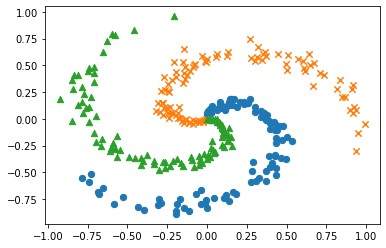

In [34]:
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## 1.4.2 신경망 구현

In [35]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
        
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        scroe = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

## 1.4.3 학습용 코드

In [42]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from ch01.two_layer_net import TwoLayerNet

# !. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 3. 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # 4. 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 5. 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d |  반복 %d / %d | 손실 %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| 에폭 1 |  반복 10 / 10 | 손실 1.13
| 에폭 2 |  반복 10 / 10 | 손실 1.13
| 에폭 3 |  반복 10 / 10 | 손실 1.12
| 에폭 4 |  반복 10 / 10 | 손실 1.12
| 에폭 5 |  반복 10 / 10 | 손실 1.11
| 에폭 6 |  반복 10 / 10 | 손실 1.14
| 에폭 7 |  반복 10 / 10 | 손실 1.16
| 에폭 8 |  반복 10 / 10 | 손실 1.11
| 에폭 9 |  반복 10 / 10 | 손실 1.12
| 에폭 10 |  반복 10 / 10 | 손실 1.13
| 에폭 11 |  반복 10 / 10 | 손실 1.12
| 에폭 12 |  반복 10 / 10 | 손실 1.11
| 에폭 13 |  반복 10 / 10 | 손실 1.09
| 에폭 14 |  반복 10 / 10 | 손실 1.08
| 에폭 15 |  반복 10 / 10 | 손실 1.04
| 에폭 16 |  반복 10 / 10 | 손실 1.03
| 에폭 17 |  반복 10 / 10 | 손실 0.96
| 에폭 18 |  반복 10 / 10 | 손실 0.92
| 에폭 19 |  반복 10 / 10 | 손실 0.92
| 에폭 20 |  반복 10 / 10 | 손실 0.87
| 에폭 21 |  반복 10 / 10 | 손실 0.85
| 에폭 22 |  반복 10 / 10 | 손실 0.82
| 에폭 23 |  반복 10 / 10 | 손실 0.79
| 에폭 24 |  반복 10 / 10 | 손실 0.78
| 에폭 25 |  반복 10 / 10 | 손실 0.82
| 에폭 26 |  반복 10 / 10 | 손실 0.78
| 에폭 27 |  반복 10 / 10 | 손실 0.76
| 에폭 28 |  반복 10 / 10 | 손실 0.76
| 에폭 29 |  반복 10 / 10 | 손실 0.78
| 에폭 30 |  반복 10 / 10 | 손실 0.75
| 에폭 31 |  반복 10 / 10 | 손실 0.78
| 에폭 32 |  반복 10 

| 에폭 255 |  반복 10 / 10 | 손실 0.12
| 에폭 256 |  반복 10 / 10 | 손실 0.12
| 에폭 257 |  반복 10 / 10 | 손실 0.12
| 에폭 258 |  반복 10 / 10 | 손실 0.12
| 에폭 259 |  반복 10 / 10 | 손실 0.13
| 에폭 260 |  반복 10 / 10 | 손실 0.12
| 에폭 261 |  반복 10 / 10 | 손실 0.13
| 에폭 262 |  반복 10 / 10 | 손실 0.12
| 에폭 263 |  반복 10 / 10 | 손실 0.12
| 에폭 264 |  반복 10 / 10 | 손실 0.13
| 에폭 265 |  반복 10 / 10 | 손실 0.12
| 에폭 266 |  반복 10 / 10 | 손실 0.12
| 에폭 267 |  반복 10 / 10 | 손실 0.12
| 에폭 268 |  반복 10 / 10 | 손실 0.12
| 에폭 269 |  반복 10 / 10 | 손실 0.11
| 에폭 270 |  반복 10 / 10 | 손실 0.12
| 에폭 271 |  반복 10 / 10 | 손실 0.12
| 에폭 272 |  반복 10 / 10 | 손실 0.12
| 에폭 273 |  반복 10 / 10 | 손실 0.12
| 에폭 274 |  반복 10 / 10 | 손실 0.12
| 에폭 275 |  반복 10 / 10 | 손실 0.11
| 에폭 276 |  반복 10 / 10 | 손실 0.12
| 에폭 277 |  반복 10 / 10 | 손실 0.12
| 에폭 278 |  반복 10 / 10 | 손실 0.11
| 에폭 279 |  반복 10 / 10 | 손실 0.11
| 에폭 280 |  반복 10 / 10 | 손실 0.11
| 에폭 281 |  반복 10 / 10 | 손실 0.11
| 에폭 282 |  반복 10 / 10 | 손실 0.12
| 에폭 283 |  반복 10 / 10 | 손실 0.11
| 에폭 284 |  반복 10 / 10 | 손실 0.11
| 에폭 285 |

In [44]:
import numpy as np
np.random.permutation(10)
np.random.permutation(10)

array([9, 8, 6, 2, 3, 5, 0, 1, 7, 4])

학습 결과 플롯

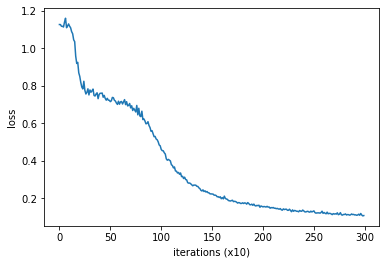

In [46]:
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

경계 영역 플롯 & 산점도 플롯

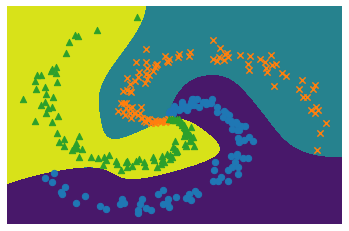

In [49]:
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## 1.4.4 Trainer 클래스

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

| 에폭 246 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 247 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 248 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 249 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 250 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 251 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 252 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 253 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 254 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 255 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 256 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 257 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 258 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 259 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 260 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 261 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 262 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 263 |  반복 1 / 10 | 시간 0[s] | 손실 0.12
| 에폭 264 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 265 |  반복 1 / 10 | 시간 0[s] | 손실 0.14
| 에폭 266 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 267 |  반복 1 / 10 | 시간 0[s] | 손실 0.13
| 에폭 268 |  반복 1 / 10 | 시간 0[s] | 손실 0.11
| 에폭 269 |  반복 1 / 10 | 시간 0[s] | 

C:\Users\KBM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KBM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KBM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KBM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KBM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KBM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
 

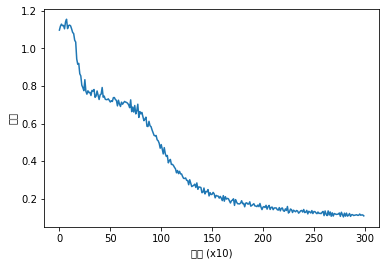

In [55]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from ch01.two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

# 1.5 계산 고속화

## 1.5.1 비트 정밀도

In [56]:
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

In [57]:
b = np.random.randn(3).astype(np.float32)
print(b.dtype)

c = np.random.randn(3).astype('f')
print(c.dtype)

float32
float32


## 1.5.2 GPU(쿠파이)

In [58]:
import cupy as cp
x = cp.arange(6).reshape(2, 3).astype('f')
x

ModuleNotFoundError: No module named 'cupy'